In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Train_path = '/content/drive/MyDrive/DataSet/Mask_detect_DataSet/Training'
Test_path = '/content/drive/MyDrive/DataSet/Mask_detect_DataSet/Test'

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True, vertical_flip = True, shear_range = 0.2, rotation_range = 30, brightness_range = [0.2, 1.0], rescale = 1./255)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [2]:
train_dataset = train_gen.flow_from_directory(Train_path, target_size = (224, 224), batch_size = 16, class_mode = 'sparse', shuffle = True)
test_dataset = test_gen.flow_from_directory(Test_path, target_size = (224, 224), batch_size = 16, class_mode = 'sparse', shuffle = True)

Found 1212 images belonging to 3 classes.
Found 400 images belonging to 3 classes.


In [3]:
print(train_dataset.class_indices)
print(test_dataset.class_indices)

{'Invalid Mask': 0, 'Mask': 1, 'NoMask': 2}
{'Invalid Mask': 0, 'Mask': 1, 'NoMask': 2}


In [4]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5, verbose = 1)

In [5]:
feature_extraction = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
feature_extraction.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
flatten_layer = tf.keras.layers.Flatten()
prediction_layer = tf.keras.layers.Dense(units = 128, activation = 'relu')
bn = tf.keras.layers.BatchNormalization()
classification_layer = tf.keras.layers.Dense(units = 3, activation = 'softmax')

In [7]:
model = tf.keras.models.Sequential([
    feature_extraction,
    flatten_layer,
    prediction_layer,
    bn,
    classification_layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 10,287,171
Trainable params: 8,028,931
Non

In [8]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [9]:
history = model.fit(train_dataset, epochs = 50, batch_size = 16, validation_data = test_dataset, verbose = 1, callbacks = [earlystopping])

Epoch 1/50
76/76 [==============================] - 843s 11s/step - loss: 0.2397 - accuracy: 0.9208 - val_loss: 0.1237 - val_accuracy: 0.9375
Epoch 2/50
76/76 [==============================] - 19s 249ms/step - loss: 0.0593 - accuracy: 0.9769 - val_loss: 9.7539e-04 - val_accuracy: 1.0000
Epoch 3/50
76/76 [==============================] - 19s 251ms/step - loss: 0.0567 - accuracy: 0.9818 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 4/50
76/76 [==============================] - 19s 256ms/step - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/50
76/76 [==============================] - 19s 252ms/step - loss: 0.0486 - accuracy: 0.9835 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 6/50
76/76 [==============================] - 19s 251ms/step - loss: 0.0238 - accuracy: 0.9942 - val_loss: 9.0414e-04 - val_accuracy: 1.0000
Epoch 7/50
76/76 [==============================] - 19s 255ms/step - loss: 0.0233 - accuracy: 0.9901 - val_loss: 0.0026 - val_accuracy:

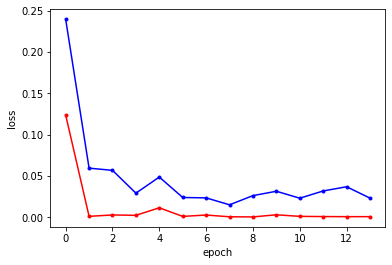

In [10]:
import numpy as np

val_loss = history.history['val_loss']
loss = history.history['loss']

x_len = np.arange(len(loss))
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation Loss")
plt.plot(x_len, loss, marker='.', c='blue', label="Train Loss")

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
model.evaluate(test_dataset)

25/25 [==============================] - 1s 58ms/step - loss: 5.9728e-04 - accuracy: 1.0000


[0.0005972822546027601, 1.0]

In [12]:
pred = model.predict(test_dataset)

25/25 [==============================] - 2s 57ms/step


In [13]:
print(pred)

[[1.3945657e-07 9.9999082e-01 9.1063685e-06]
 [9.9995041e-01 4.6239107e-05 3.3182926e-06]
 [3.6386343e-08 1.8298618e-07 9.9999976e-01]
 ...
 [1.4974878e-08 9.9999964e-01 3.4596749e-07]
 [5.7947471e-08 5.9316285e-06 9.9999404e-01]
 [9.9997127e-01 2.0425698e-05 8.3714021e-06]]


In [14]:
#model.save('/content/drive/MyDrive/개인 연습/aug2_model.h5')

In [15]:
#from google.colab import files

#files.download('/content/drive/MyDrive/개인 연습/aug2_model.h5')